### Use the World Bank API to get population data for all African countries from 2000 to 2020, analyze it, and present insights with visuals only (in a notebook and a presentation)

In [1]:
# Install Required Libraries
import requests
import pandas as pd
import matplotlib.pyplot as plt
import time

### Get African Country Codes

In [3]:
# World Bank API endpoint for country metadata by region

# API URL to get African countries
url = "http://api.worldbank.org/v2/region/AFR/country?format=json&per_page=100"
# Send the request
response = requests.get(url)
# Parse the JSON
data = response.json()
# Check the structure of the data
print(data[0])  # Metadata
print('--------------------------')
print(data[1][0])  # First country's details
print('--------------------------')
africa_countries = [country['id'] for country in data[1]]
print("Total African countries:", len(africa_countries))
print('--------------------------')
print("African country codes:", africa_countries)

{'page': 1, 'pages': 1, 'per_page': '100', 'total': 54}
--------------------------
{'id': 'AGO', 'iso2Code': 'AO', 'name': 'Angola', 'region': {'id': 'SSF', 'iso2code': 'ZG', 'value': 'Sub-Saharan Africa '}, 'adminregion': {'id': 'SSA', 'iso2code': 'ZF', 'value': 'Sub-Saharan Africa (excluding high income)'}, 'incomeLevel': {'id': 'LMC', 'iso2code': 'XN', 'value': 'Lower middle income'}, 'lendingType': {'id': 'IBD', 'iso2code': 'XF', 'value': 'IBRD'}, 'capitalCity': 'Luanda', 'longitude': '13.242', 'latitude': '-8.81155'}
--------------------------
Total African countries: 54
--------------------------
African country codes: ['AGO', 'BDI', 'BEN', 'BFA', 'BWA', 'CAF', 'CIV', 'CMR', 'COD', 'COG', 'COM', 'CPV', 'DJI', 'DZA', 'EGY', 'ERI', 'ETH', 'GAB', 'GHA', 'GIN', 'GMB', 'GNB', 'GNQ', 'KEN', 'LBR', 'LBY', 'LSO', 'MAR', 'MDG', 'MLI', 'MOZ', 'MRT', 'MUS', 'MWI', 'NAM', 'NER', 'NGA', 'RWA', 'SDN', 'SEN', 'SLE', 'SOM', 'SSD', 'STP', 'SWZ', 'SYC', 'TCD', 'TGO', 'TUN', 'TZA', 'UGA', 'ZAF', 'Z

In [5]:
country_info = [{'code': country['id'], 'name': country['name']} for country in data[1]]
for c in country_info[:5]:
    print(c)

{'code': 'AGO', 'name': 'Angola'}
{'code': 'BDI', 'name': 'Burundi'}
{'code': 'BEN', 'name': 'Benin'}
{'code': 'BFA', 'name': 'Burkina Faso'}
{'code': 'BWA', 'name': 'Botswana'}


### Get Population Data for Each Country (2000–2020)

In [7]:
def get_population_data(country_code):
    url = f"http://api.worldbank.org/v2/country/{country_code}/indicator/SP.POP.TOTL?date=2000:2020&format=json&per_page=100"
    response = requests.get(url)
    if response.status_code == 200:
        data = response.json()
        return data[1]
    else:
        return []

# Loop through countries and get population data
# Create an empty list to store data
all_data = []

# Loop through African country codes
for code in africa_countries:
    pop_data = get_population_data(code)
    for entry in pop_data:
        if entry['value'] is not None:
            all_data.append({
                'country': entry['country']['value'],
                'year': int(entry['date']),
                'population': int(entry['value'])
            })
    time.sleep(0.2)  # to avoid being blocked by API
print(all_data)

[{'country': 'Angola', 'year': 2020, 'population': 33451132}, {'country': 'Angola', 'year': 2019, 'population': 32375632}, {'country': 'Angola', 'year': 2018, 'population': 31297155}, {'country': 'Angola', 'year': 2017, 'population': 30234839}, {'country': 'Angola', 'year': 2016, 'population': 29183070}, {'country': 'Angola', 'year': 2015, 'population': 28157798}, {'country': 'Angola', 'year': 2014, 'population': 27160769}, {'country': 'Angola', 'year': 2013, 'population': 26165620}, {'country': 'Angola', 'year': 2012, 'population': 25177394}, {'country': 'Angola', 'year': 2011, 'population': 24218352}, {'country': 'Angola', 'year': 2010, 'population': 23294825}, {'country': 'Angola', 'year': 2009, 'population': 22414773}, {'country': 'Angola', 'year': 2008, 'population': 21578655}, {'country': 'Angola', 'year': 2007, 'population': 20778561}, {'country': 'Angola', 'year': 2006, 'population': 20015279}, {'country': 'Angola', 'year': 2005, 'population': 19291161}, {'country': 'Angola', '

In [9]:
# Convert list to DataFrame
df = pd.DataFrame(all_data)
# print(df.head())
# print(df.tail())
print(df)

       country  year  population
0       Angola  2020    33451132
1       Angola  2019    32375632
2       Angola  2018    31297155
3       Angola  2017    30234839
4       Angola  2016    29183070
...        ...   ...         ...
1129  Zimbabwe  2004    12365896
1130  Zimbabwe  2003    12232323
1131  Zimbabwe  2002    12087653
1132  Zimbabwe  2001    11971901
1133  Zimbabwe  2000    11892055

[1134 rows x 3 columns]


In [11]:
# Save the DataFrame to a CSV file
df.to_csv("Group_6_demo.csv", index=False)

print("Data saved to Group_6_demo.csv")

Data saved to Group_6_demo.csv


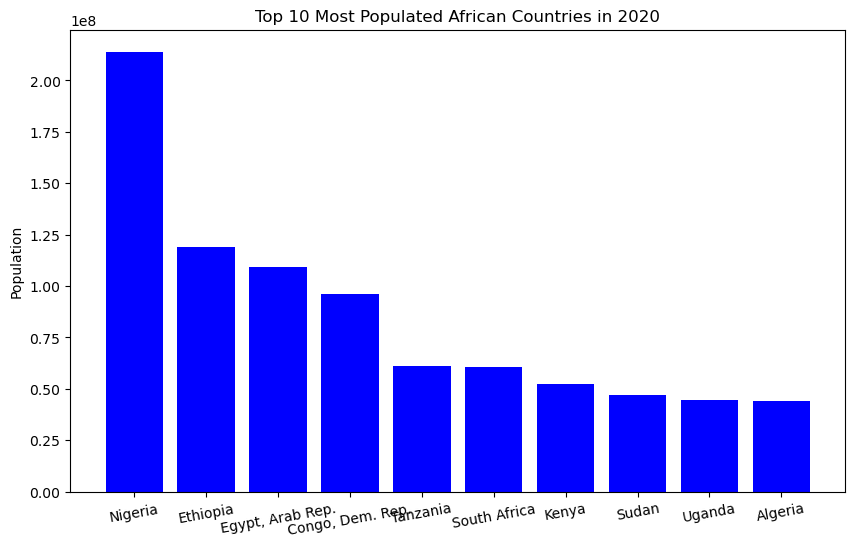

In [21]:
top_2020 = df[df['year'] == 2020].sort_values(by='population', ascending=False).head(10)
plt.figure(figsize=(10,6))
plt.bar(top_2020['country'], top_2020['population'], color='blue')
plt.xticks(rotation=10)
plt.title('Top 10 Most Populated African Countries in 2020')
plt.ylabel('Population')
# plt.tight_layout()
plt.show()

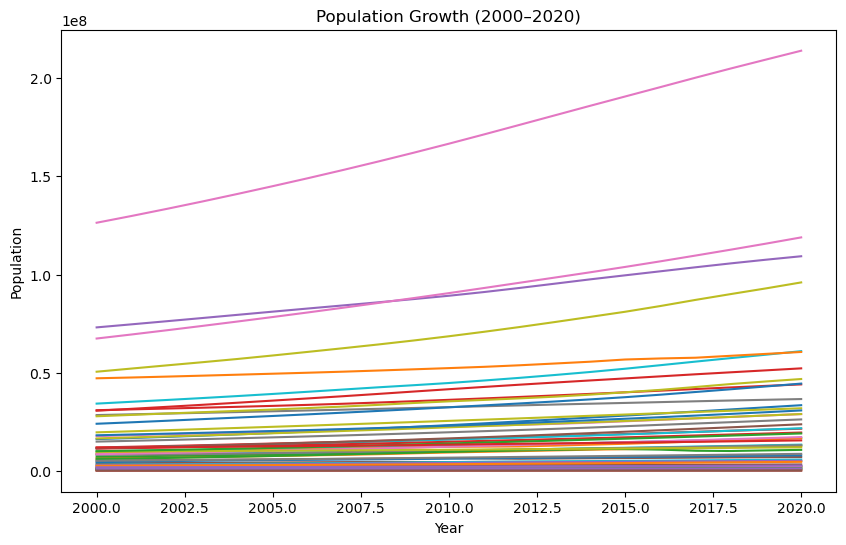

In [35]:
countries = df['country'].unique()
plt.figure(figsize=(10,6))

for c in countries:
    country_df = df[df['country'] == c]
    plt.plot(country_df['year'], country_df['population'], label=c)

plt.title('Population Growth (2000–2020)')
plt.xlabel('Year')
plt.ylabel('Population')
# plt.legend()
# plt.grid(True)
plt.show()